In [1]:
import pandas as pd

df = pd.read_csv('Life_Expectancy_Data.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,Country,Year,Status,Life_expectancy,Adult Mortality,Alcohol,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...
2718,Zimbabwe,2005,Developing,44.6,717.0,4.14,9.0,9.0,0.406,9.3
2719,Zimbabwe,2003,Developing,44.5,715.0,4.06,9.8,9.9,0.418,9.5
2720,Zimbabwe,2002,Developing,44.8,73.0,4.43,1.2,1.3,0.427,10.0
2721,Zimbabwe,2001,Developing,45.3,686.0,1.72,1.6,1.7,0.427,9.8


In [2]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult Mortality',
       'Alcohol', 'thinness_1-19 years', 'thinness_5-9 years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [3]:
missing_values_count = df.isnull().sum()
missing_values_count

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult Mortality                    0
Alcohol                            0
thinness_1-19 years                0
thinness_5-9 years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

       Country  Year      Status  Life_expectancy  Adult Mortality  Alcohol  \
0  Afghanistan  2015  Developing             65.0            263.0     0.01   
1  Afghanistan  2014  Developing             59.9            271.0     0.01   
2  Afghanistan  2013  Developing             59.9            268.0     0.01   
3  Afghanistan  2012  Developing             59.5            272.0     0.01   
4  Afghanistan  2011  Developing             59.2            275.0     0.01   

   thinness_1-19 years  thinness_5-9 years  Income_composition_of_resources  \
0                 17.2                17.3                            0.479   
1                 17.5                17.5                            0.476   
2                 17.7                17.7                            0.470   
3                 17.9                18.0                            0.463   
4                 18.2                18.2                            0.454   

   Schooling  
0       10.1  
1       10.0  
2    

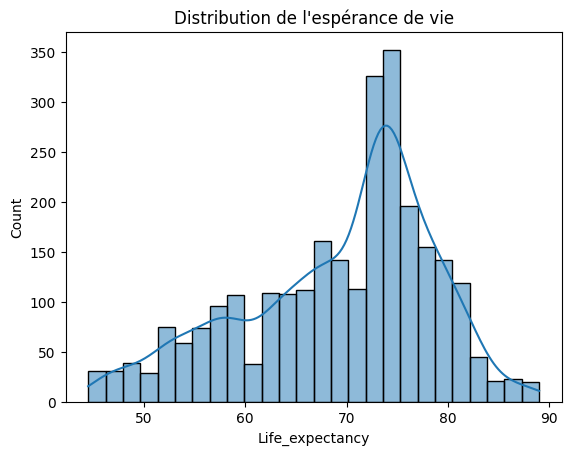

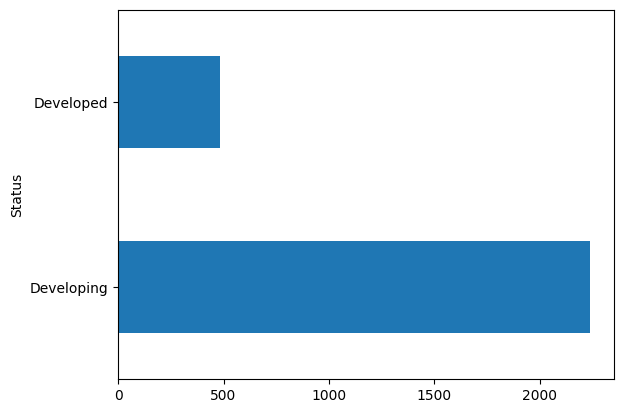

In [4]:
import pandas as pd # type: ignore
# print(pd._version_)
import seaborn as sns
import matplotlib.pyplot as plt


# Etape 1
    # Load data

print(df.head())

print(df.describe())
sns.histplot(df['Life_expectancy'], kde=True)
plt.title('Distribution de l\'espérance de vie')
plt.show()

df["Status"].value_counts().plot.barh();

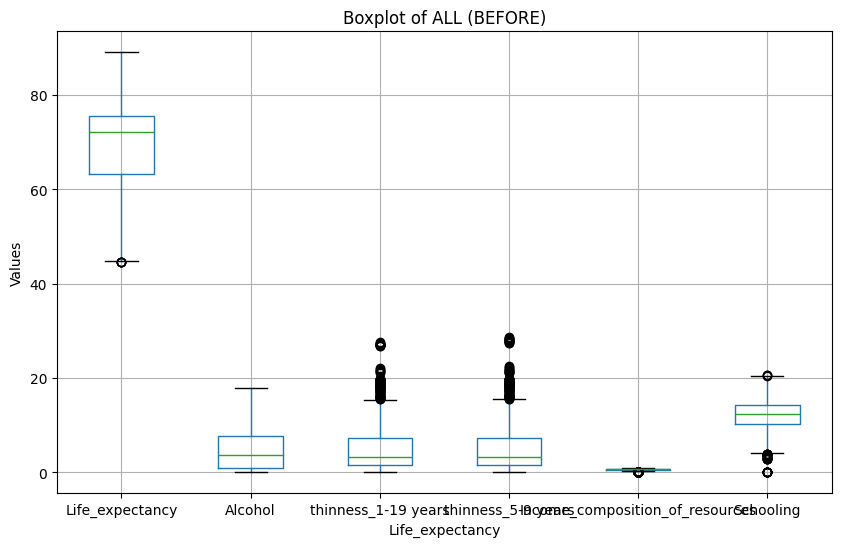

Life_expectancy Q1:
63.25
Life_expectancy Q3:
75.6
12.349999999999994
Lower: 44.72500000000001
Upper: 94.12499999999999
valeurs aberrantes de Life_expectancy:
2723
_
Adult Mortality Q1:
73.0
Adult Mortality Q3:
226.0
153.0
Lower: -156.5
Upper: 455.5
valeurs aberrantes de Adult Mortality:
2723
_
Alcohol Q1:
0.88
Alcohol Q3:
7.745
6.865
Lower: -9.417499999999999
Upper: 18.0425
valeurs aberrantes de Alcohol:
2723
_
thinness_1-19 years Q1:
1.6
thinness_1-19 years Q3:
7.2
5.6
Lower: -6.799999999999999
Upper: 15.599999999999998
valeurs aberrantes de thinness_1-19 years:
2723
_
thinness_5-9 years Q1:
1.6
thinness_5-9 years Q3:
7.2
5.6
Lower: -6.799999999999999
Upper: 15.599999999999998
valeurs aberrantes de thinness_5-9 years:
2723
_
Income_composition_of_resources Q1:
0.5045
Income_composition_of_resources Q3:
0.771
0.26650000000000007
Lower: 0.10474999999999984
Upper: 1.1707500000000002
valeurs aberrantes de Income_composition_of_resources:
2723
_
Schooling Q1:
10.2
Schooling Q3:
14.3
4.100

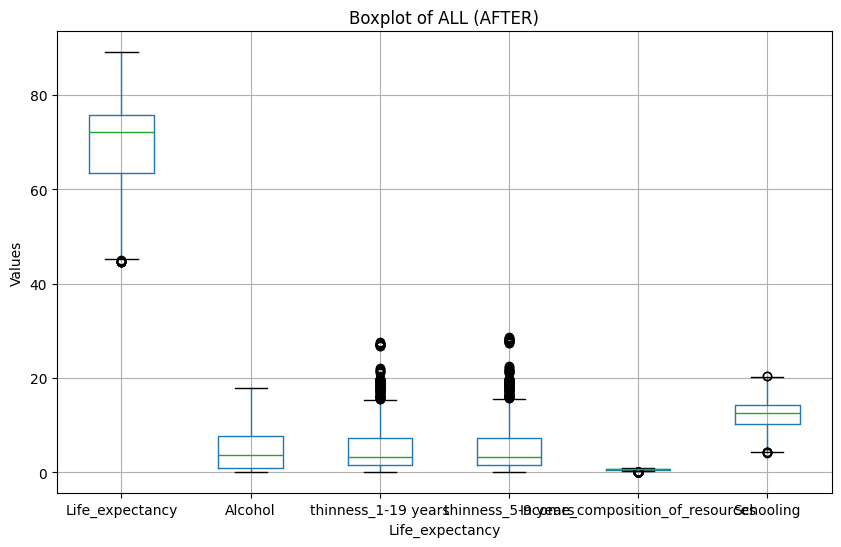

2683


In [5]:
# Etape 2
    # Identifier les valeurs aberrantes

# before    
plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
df.drop(columns=['Country', 'Year', 'Status', 'Adult Mortality']).boxplot()
plt.title('Boxplot of ALL (BEFORE)')
plt.xlabel('Life_expectancy')
plt.ylabel('Values')
plt.show()


selected_variables =['Life_expectancy','Adult Mortality','Alcohol','thinness_1-19 years','thinness_5-9 years','Income_composition_of_resources','Schooling']
for var in selected_variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    print(var+" Q1:")
    print(Q1)
    print(var+" Q3:")
    print(Q3)
    IQR = Q3 - Q1
    print(IQR)

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print("Lower:",lower_bound)
    print("Upper:",upper_bound)

    print("valeurs aberrantes de "+var+":")
    outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
    print(len(df))
    print("_")

plt.figure(figsize=(10, 6))  # Optional: Set the size of the figure
outliers.drop(columns=['Country', 'Year', 'Status', 'Adult Mortality']).boxplot()
plt.title('Boxplot of ALL (AFTER)')
plt.xlabel('Life_expectancy')
plt.ylabel('Values')
plt.show()
print(len(outliers['Life_expectancy']) )

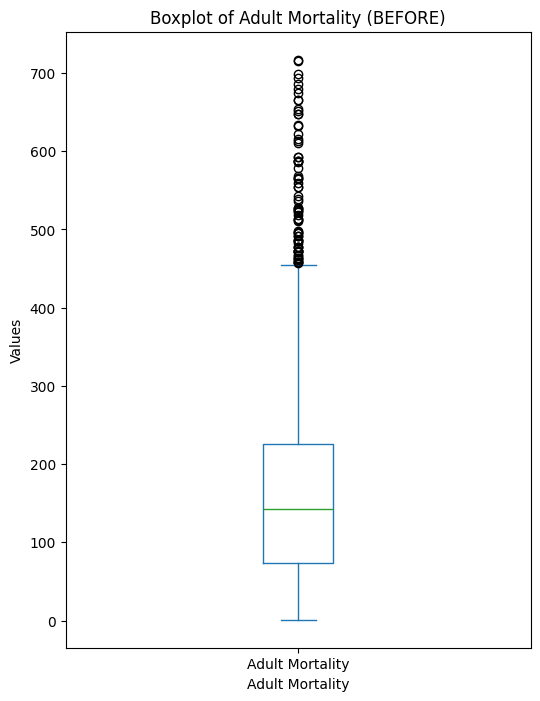

Adult Mortality Q1:
73.0
Adult Mortality Q3:
226.0
153.0
Lower: -156.5
Upper: 455.5
valeurs aberrantes de Adult Mortality:
2723
_


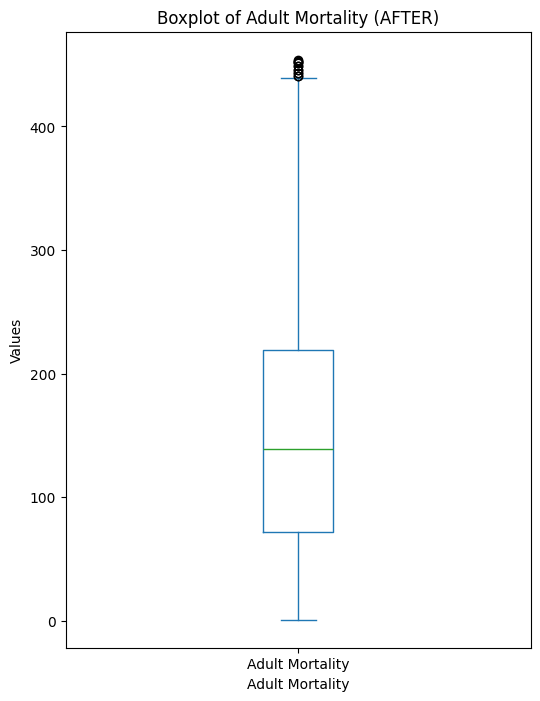

In [6]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['Adult Mortality'].plot(kind='box')
plt.title('Boxplot of Adult Mortality (BEFORE)')
plt.xlabel('Adult Mortality')
plt.ylabel('Values')
var = 'Adult Mortality'
# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['Adult Mortality'].plot(kind='box')
plt.title('Boxplot of Adult Mortality (AFTER)')
plt.xlabel('Adult Mortality')
plt.ylabel('Values')

# Show the plot
plt.show()

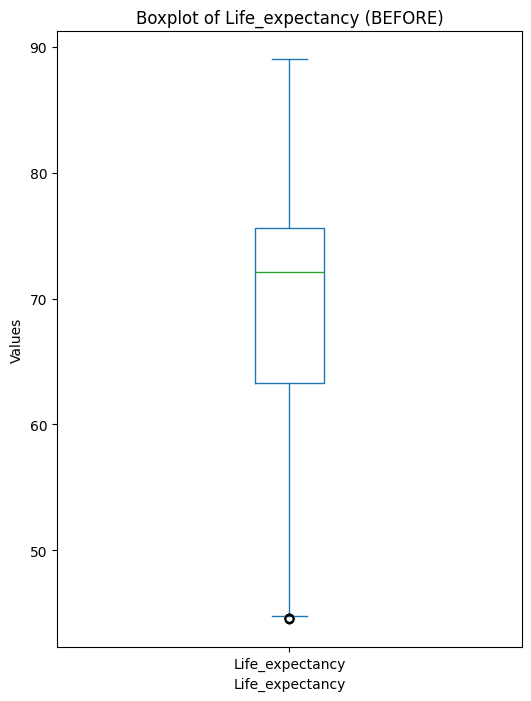

Life_expectancy Q1:
63.25
Life_expectancy Q3:
75.6
12.349999999999994
Lower: 44.72500000000001
Upper: 94.12499999999999
valeurs aberrantes de Life_expectancy:
2723
_


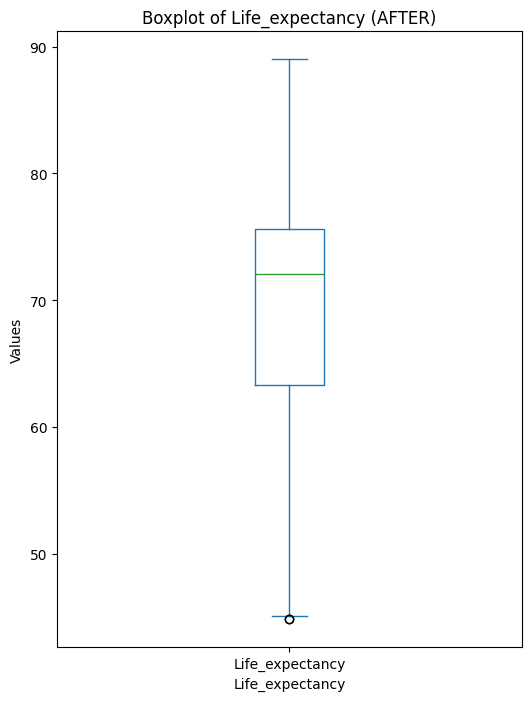

In [7]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['Life_expectancy'].plot(kind='box')
plt.title('Boxplot of Life_expectancy (BEFORE)')
plt.xlabel('Life_expectancy')
plt.ylabel('Values')
var = 'Life_expectancy'
# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['Life_expectancy'].plot(kind='box')
plt.title('Boxplot of Life_expectancy (AFTER)')
plt.xlabel('Life_expectancy')
plt.ylabel('Values')

# Show the plot
plt.show()

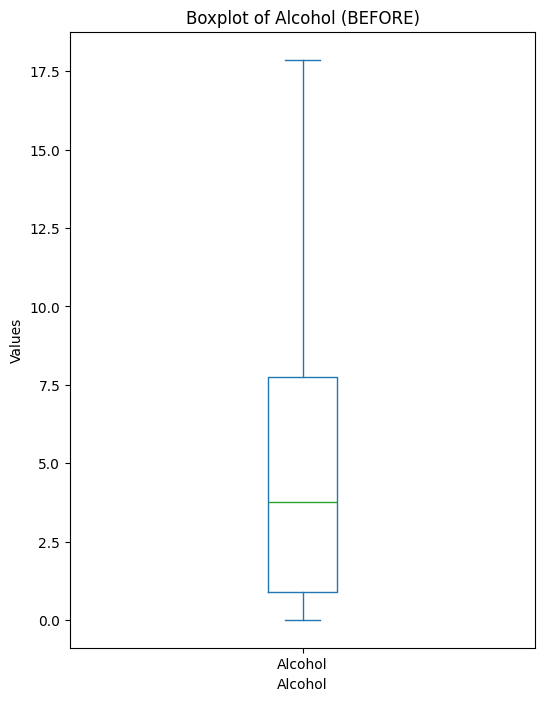

Alcohol Q1:
0.88
Alcohol Q3:
7.745
6.865
Lower: -9.417499999999999
Upper: 18.0425
valeurs aberrantes de Alcohol:
2723
_


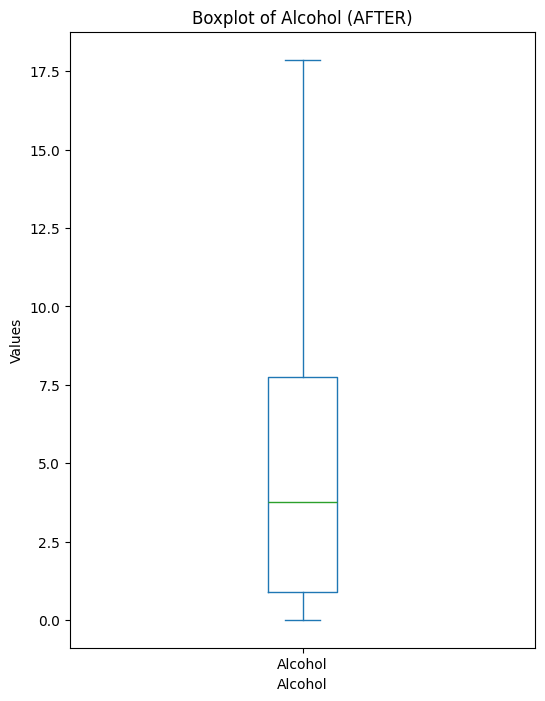

In [8]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['Alcohol'].plot(kind='box')
plt.title('Boxplot of Alcohol (BEFORE)')
plt.xlabel('Alcohol')
plt.ylabel('Values')
var = 'Alcohol'

# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['Alcohol'].plot(kind='box')
plt.title('Boxplot of Alcohol (AFTER)')
plt.xlabel('Alcohol')
plt.ylabel('Values')

# Show the plot
plt.show()

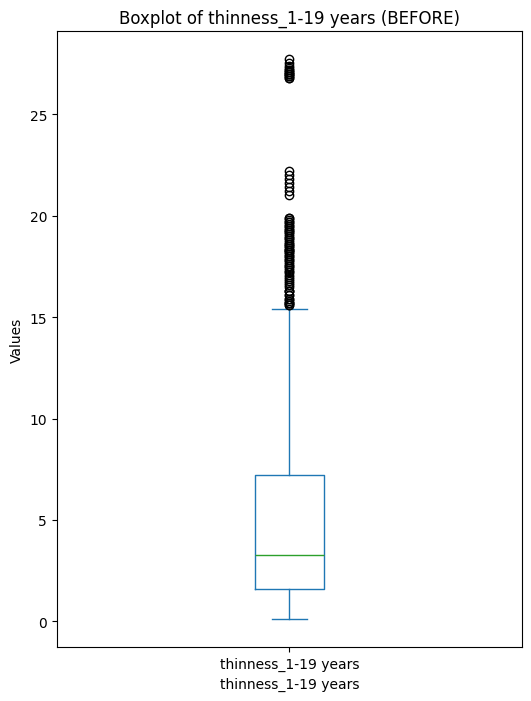

thinness_1-19 years Q1:
1.6
thinness_1-19 years Q3:
7.2
5.6
Lower: -6.799999999999999
Upper: 15.599999999999998
valeurs aberrantes de thinness_1-19 years:
2723
_


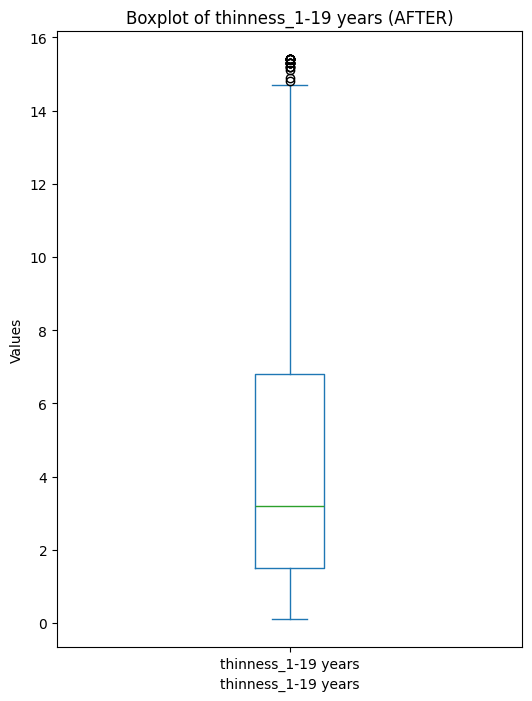

In [9]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['thinness_1-19 years'].plot(kind='box')
plt.title('Boxplot of thinness_1-19 years (BEFORE)')
plt.xlabel('thinness_1-19 years')
plt.ylabel('Values')
var = 'thinness_1-19 years'

# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['thinness_1-19 years'].plot(kind='box')
plt.title('Boxplot of thinness_1-19 years (AFTER)')
plt.xlabel('thinness_1-19 years')
plt.ylabel('Values')

# Show the plot
plt.show()

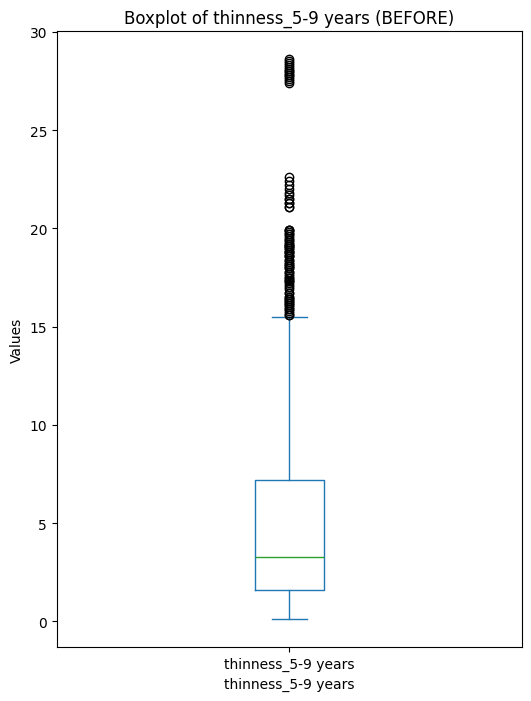

thinness_5-9 years Q1:
1.6
thinness_5-9 years Q3:
7.2
5.6
Lower: -6.799999999999999
Upper: 15.599999999999998
valeurs aberrantes de thinness_5-9 years:
2723
_


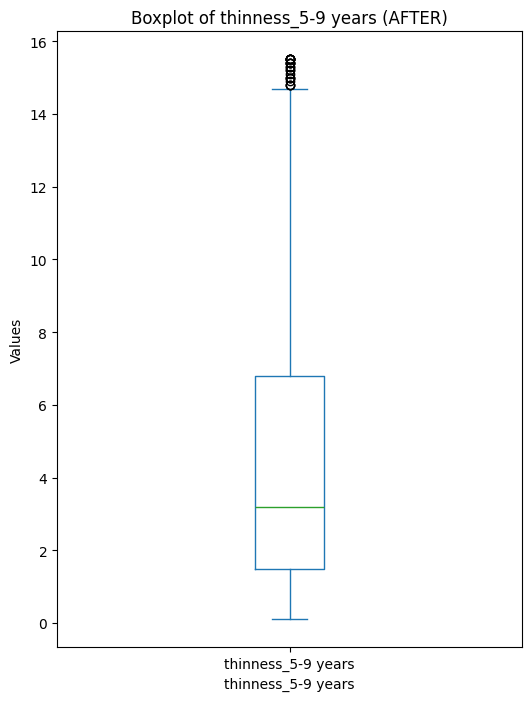

In [10]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['thinness_5-9 years'].plot(kind='box')
plt.title('Boxplot of thinness_5-9 years (BEFORE)')
plt.xlabel('thinness_5-9 years')
plt.ylabel('Values')
var = 'thinness_5-9 years'

# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['thinness_5-9 years'].plot(kind='box')
plt.title('Boxplot of thinness_5-9 years (AFTER)')
plt.xlabel('thinness_5-9 years')
plt.ylabel('Values')

# Show the plot
plt.show()

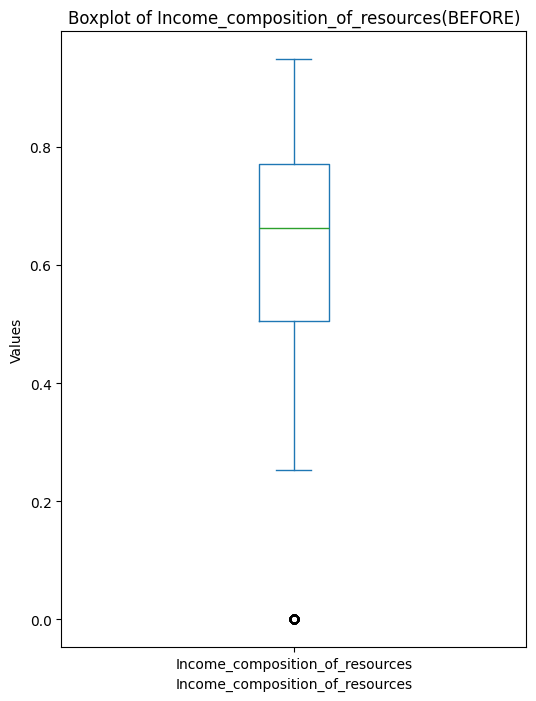

Income_composition_of_resources Q1:
0.5045
Income_composition_of_resources Q3:
0.771
0.26650000000000007
Lower: 0.10474999999999984
Upper: 1.1707500000000002
valeurs aberrantes de Income_composition_of_resources:
2723
_


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


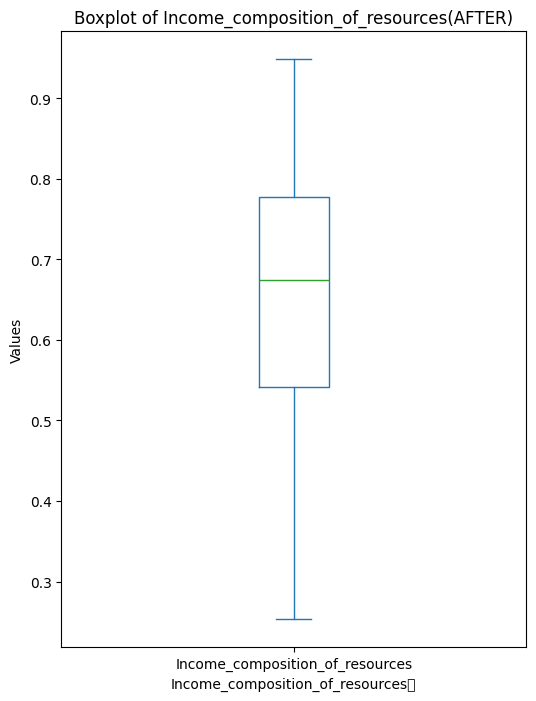

In [11]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['Income_composition_of_resources'].plot(kind='box')
plt.title('Boxplot of Income_composition_of_resources(BEFORE)')
plt.xlabel('Income_composition_of_resources')
plt.ylabel('Values')
var = 'Income_composition_of_resources'

# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['Income_composition_of_resources'].plot(kind='box')
plt.title('Boxplot of Income_composition_of_resources(AFTER)')
plt.xlabel('Income_composition_of_resources	')
plt.ylabel('Values')

# Show the plot
plt.show()

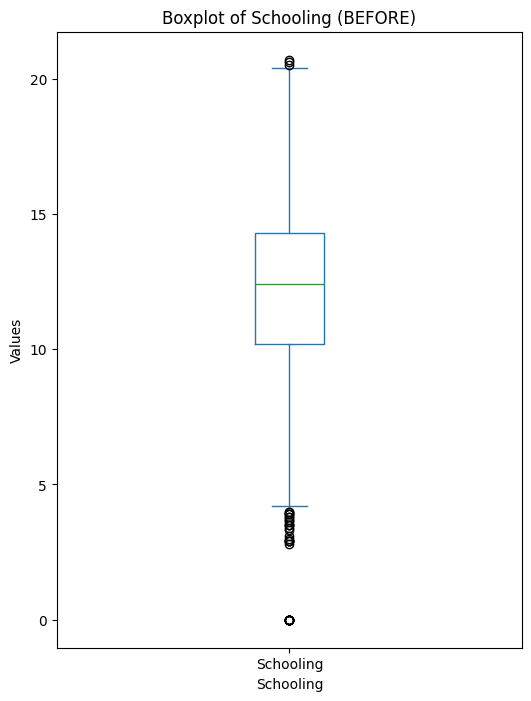

Schooling Q1:
10.2
Schooling Q3:
14.3
4.100000000000001
Lower: 4.049999999999997
Upper: 20.450000000000003
valeurs aberrantes de Schooling:
2723
_


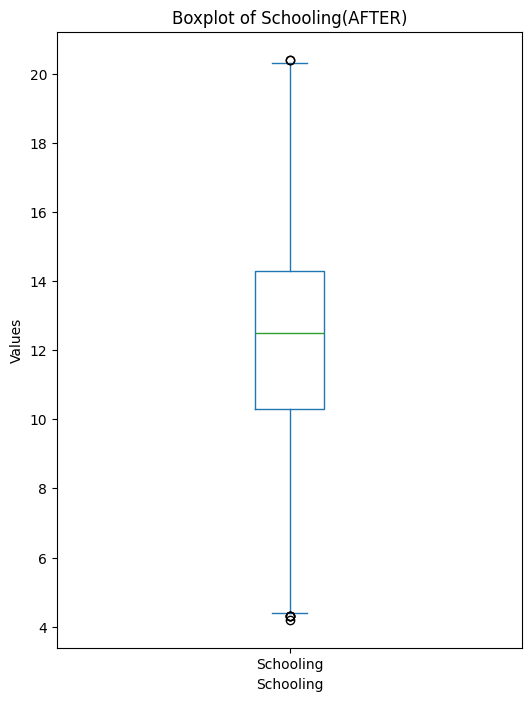

In [12]:
import matplotlib.pyplot as plt

# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
df['Schooling'].plot(kind='box')
plt.title('Boxplot of Schooling (BEFORE)')
plt.xlabel('Schooling')
plt.ylabel('Values')
var = 'Schooling'

# Show the plot
plt.show()

Q1 = df[var].quantile(0.25)
Q3 = df[var].quantile(0.75)
print(var+" Q1:")
print(Q1)
print(var+" Q3:")
print(Q3)
IQR = Q3 - Q1
print(IQR)




lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print("Lower:",lower_bound)
print("Upper:",upper_bound)






print("valeurs aberrantes de "+var+":")
outliers = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
print(len(df))
print("_")



# Create the boxplot for a single variable
plt.figure(figsize=(6, 8))  # Optional: Set the size of the figure
outliers['Schooling'].plot(kind='box')
plt.title('Boxplot of Schooling(AFTER)')
plt.xlabel('Schooling')
plt.ylabel('Values')

# Show the plot
plt.show()

Correlation Matrix:
                                 Life_expectancy  Adult Mortality   Alcohol  \
Life_expectancy                         1.000000        -0.687521  0.408675   
Adult Mortality                        -0.687521         1.000000 -0.197055   
Alcohol                                 0.408675        -0.197055  1.000000   
thinness_1-19 years                    -0.475847         0.303272 -0.426815   
thinness_5-9 years                     -0.473240         0.311466 -0.418355   
Income_composition_of_resources         0.679205        -0.422716  0.433179   
Schooling                               0.701367        -0.419470  0.529217   

                                 thinness_1-19 years  thinness_5-9 years  \
Life_expectancy                            -0.475847           -0.473240   
Adult Mortality                             0.303272            0.311466   
Alcohol                                    -0.426815           -0.418355   
thinness_1-19 years                        

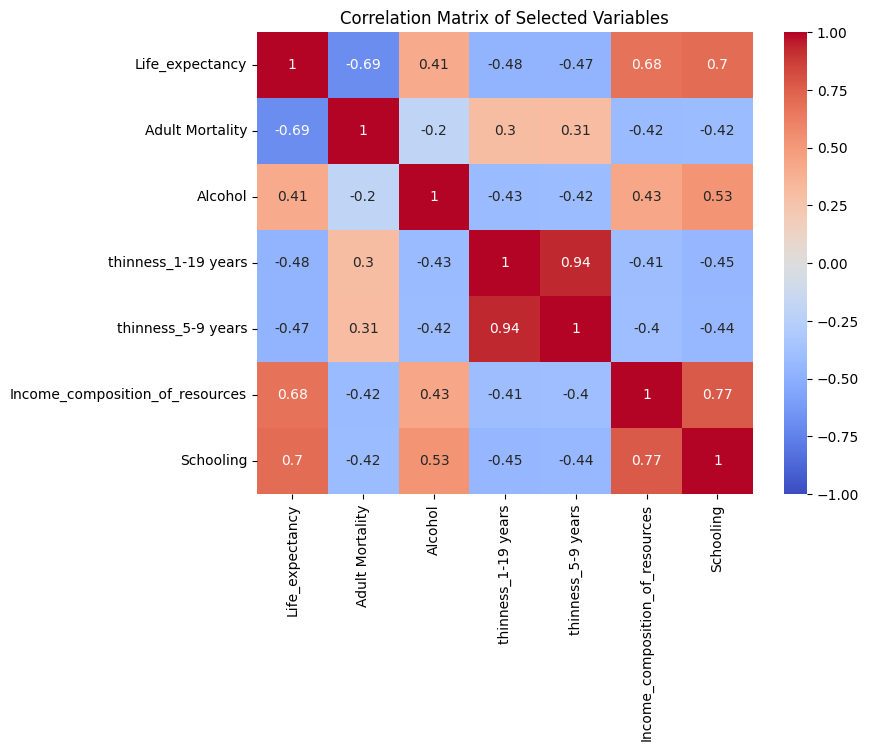

In [13]:
# Etape 3
    #Examiner la relation entre l'espérance de vie et les autres variables

# Calculate the correlation matrix
selected_variables =['Life_expectancy', 'Adult Mortality', 'Alcohol', 'thinness_1-19 years','thinness_5-9 years','Income_composition_of_resources','Schooling']
correlation_matrix = df[selected_variables].corr()
# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the correlation matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Variables')
plt.show()

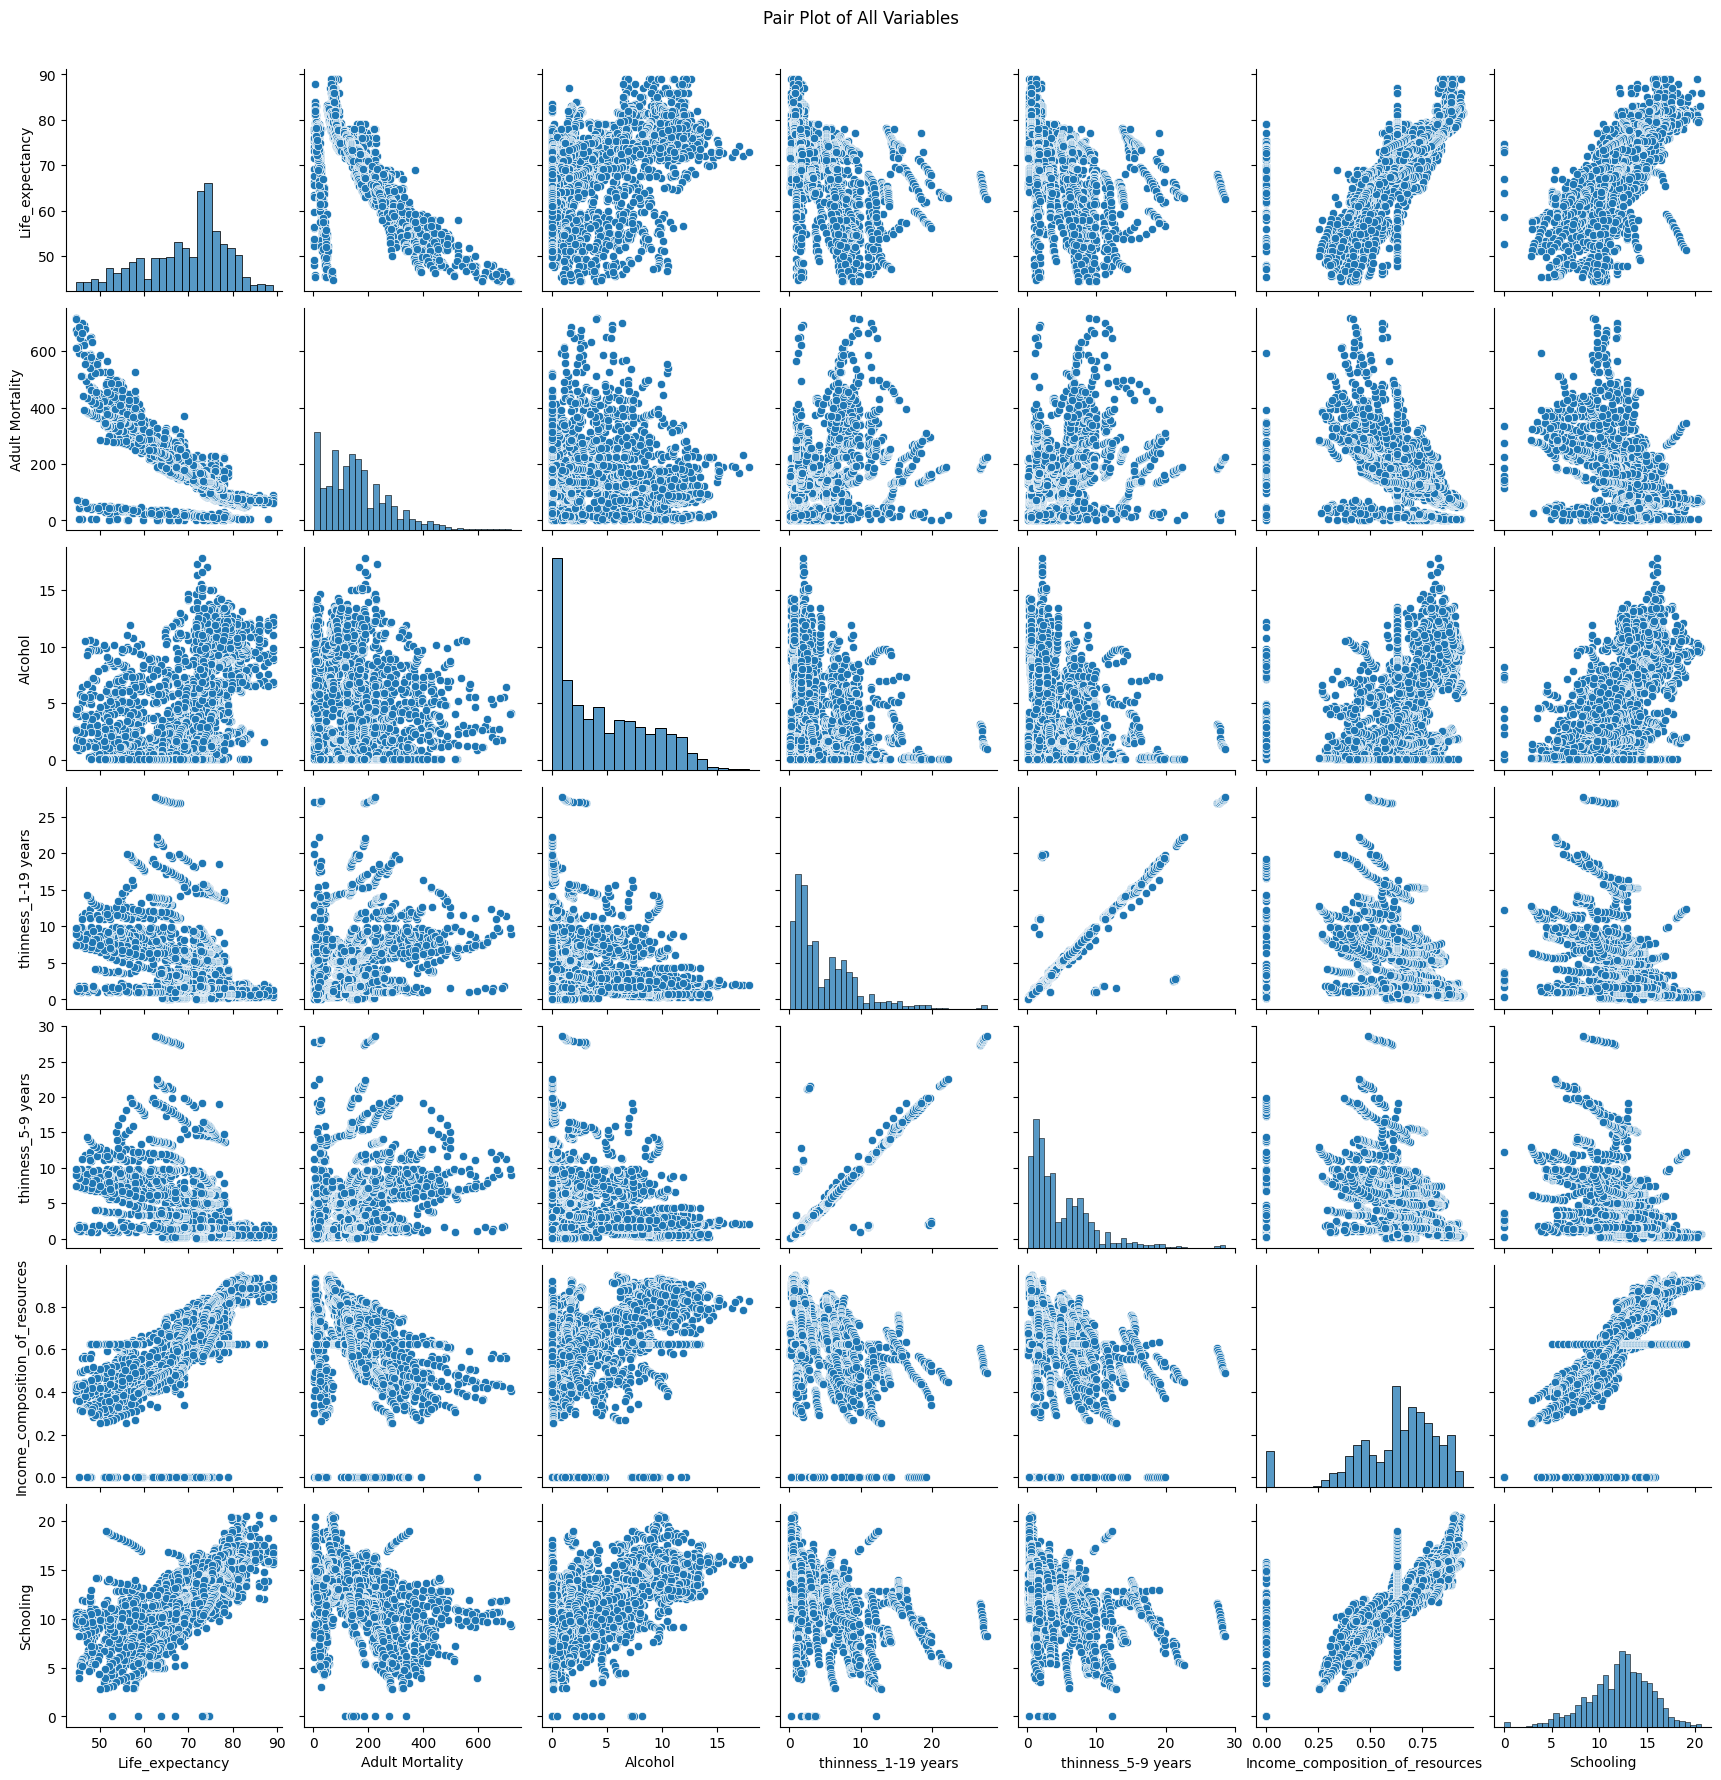

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_variables =['Life_expectancy', 'Adult Mortality', 'Alcohol', 'thinness_1-19 years','thinness_5-9 years','Income_composition_of_resources','Schooling']
# Pair plot
sns.pairplot(df[selected_variables])
plt.suptitle('Pair Plot of All Variables', y=1.02)  # Adjust the title position
plt.show()

In [15]:
# Etape 4 
    # Choix de la variable indépendante: 

correlation_with_life_expectancy = correlation_matrix['Life_expectancy'].abs().sort_values(ascending=False)
print(correlation_with_life_expectancy)


Life_expectancy                    1.000000
Schooling                          0.701367
Adult Mortality                    0.687521
Income_composition_of_resources    0.679205
thinness_1-19 years                0.475847
thinness_5-9 years                 0.473240
Alcohol                            0.408675
Name: Life_expectancy, dtype: float64


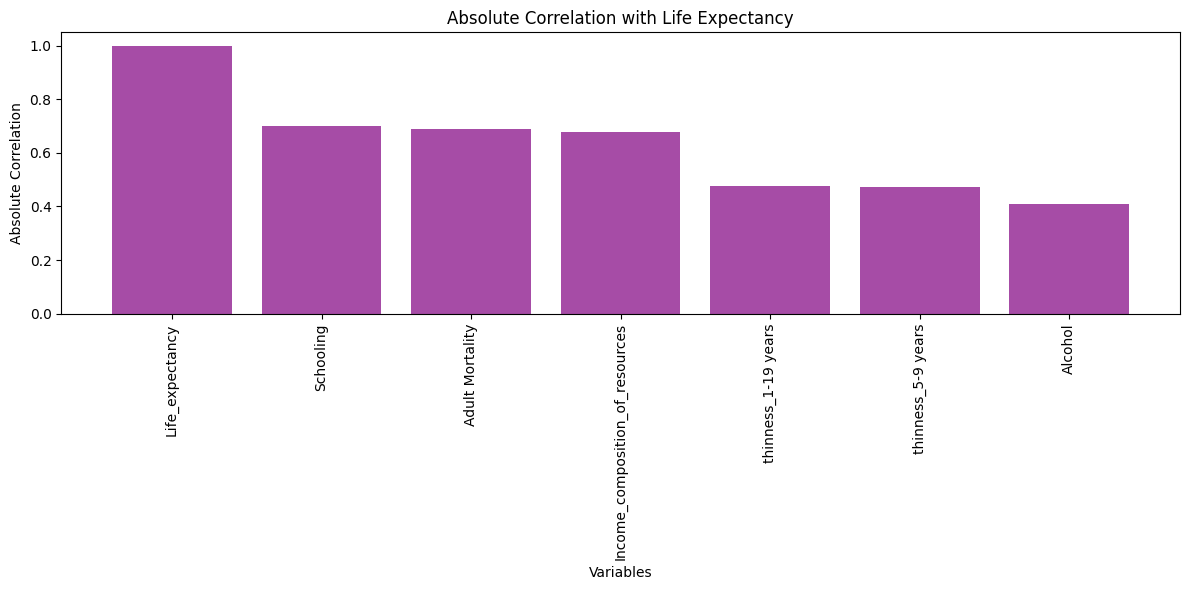

In [16]:
# Create a bar chart
plt.figure(figsize=(12, 6))  # Set the size of the chart (optional, adjust as needed)
plt.bar(correlation_with_life_expectancy.index, correlation_with_life_expectancy.values, color='purple', alpha=0.7)

# Add labels and title
plt.xlabel('Variables')
plt.ylabel('Absolute Correlation')
plt.title('Absolute Correlation with Life Expectancy')

# Rotate the x-axis labels for better readability (optional, adjust as needed)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # To ensure all labels are visible
plt.show()

In [17]:
# Etape 5
    # Préparation des données: 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

selected_variables_X =['Life_expectancy']
selected_variables_Y =['Schooling']
X = df[selected_variables_X]
y = df[selected_variables_Y]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

print('X_train : ---------------------------------------')
print(X_train)
print('X_test : ---------------------------------------')
print(X_test)
print('y_train : ---------------------------------------')
print(y_train)
print('y_test : ---------------------------------------')
print(y_test)

X_train : ---------------------------------------
      Life_expectancy
1783             81.8
1106             88.0
923              73.9
642              78.6
1670             64.2
...               ...
1638             71.8
1095             71.7
1130             68.1
1294             65.5
860              83.0

[1769 rows x 1 columns]
X_test : ---------------------------------------
      Life_expectancy
1398             67.0
535              74.2
1525             51.2
1017             54.0
1675             62.5
...               ...
2603             76.9
949              61.6
2045             72.1
444              65.0
2669             75.2

[954 rows x 1 columns]
y_train : ---------------------------------------
      Schooling
1783       17.7
1106       18.3
923        13.1
642        13.4
1670        8.0
...         ...
1638       10.3
1095       13.9
1130       12.1
1294       11.9
860        16.9

[1769 rows x 1 columns]
y_test : ---------------------------------------
      Sc

In [18]:
# Etape 6 
    # Construction du modèle :

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Etape 7 
    # Évaluation du modèle : 


# Make predictions
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculer la MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculer le R²
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')


Mean Squared Error: 5.264736837236674
R² Score: 0.49740820899422744


Cross-Validation R^2 Scores: [0.68751327 0.57209121 0.6668606  0.66083162 0.66716297 0.72426461
 0.74445769 0.71372159 0.72175716]
Average Cross-Validation R^2: 0.6842956355431968
Cross-validation scores (test): [0.68751327 0.57209121 0.6668606  0.66083162 0.66716297 0.72426461
 0.74445769 0.71372159 0.72175716]
Cross-validation scores (train): [0.68472751 0.69958346 0.6869208  0.68777234 0.68739778 0.67997359
 0.67873262 0.68153502 0.6802753 ]
Mean cross-validation score (test): 0.6842956355431968
Predictions: [[70.16187634]
 [68.32080298]
 [66.47972961]
 [64.63865625]
 [62.79758289]]


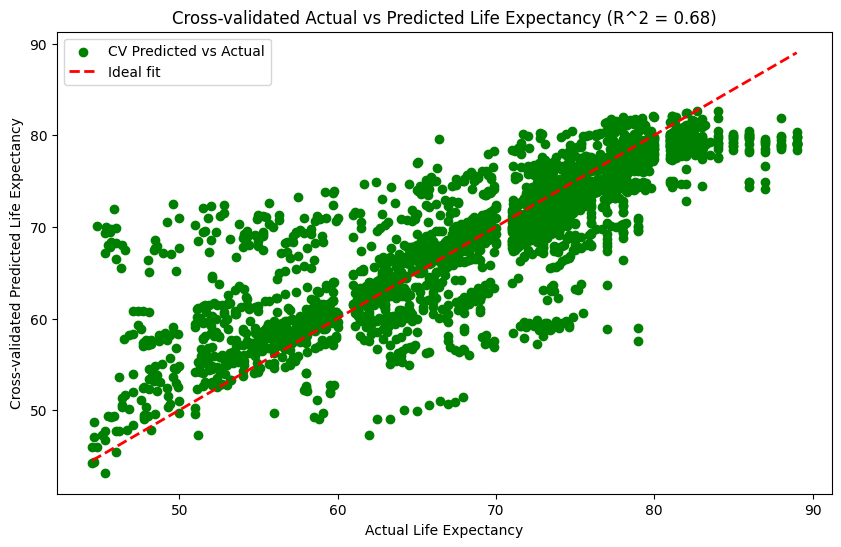

In [20]:
# Etape 8 
    # Visualisation des résultats 

import pandas as pd
from sklearn.model_selection import cross_val_score, cross_validate, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Define the features and target variable
selected_variables_X = ['Adult Mortality', 'Alcohol', 'thinness_1-19 years', 'Income_composition_of_resources']
selected_variables_Y = ['Life_expectancy']
X = df[selected_variables_X]
y = df[selected_variables_Y]

# Initialize the model
model = LinearRegression()

# Perform 9-fold cross-validation
kf = KFold(n_splits=9, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, scoring='r2', cv=kf)
print('Cross-Validation R^2 Scores:', scores)
print('Average Cross-Validation R^2:', scores.mean())

# Print cross-validation results
cv_results = cross_validate(model, X, y, cv=kf, scoring='r2', return_train_score=True)
print("Cross-validation scores (test):", cv_results['test_score'])
print("Cross-validation scores (train):", cv_results['train_score'])
print("Mean cross-validation score (test):", cv_results['test_score'].mean())

# Train the model on the full dataset
model.fit(X, y)

# Make predictions on new data
X_sen = pd.DataFrame({
    'Adult Mortality': [100, 200, 300, 400, 500],  # Add new values
    'Alcohol': [5, 6, 7, 8, 9],                # Add new values
    'thinness_1-19 years': [2, 3, 4, 5, 6],    # Add new values
    'Income_composition_of_resources': [0.5, 0.6, 0.7, 0.8, 0.9]  # Add new values
})
y_sen = model.predict(X_sen)
print("Predictions:", y_sen)

# Plot cross-validated predictions vs. actual values
y_cv_pred = cross_val_predict(model, X, y, cv=kf)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_cv_pred, color='green', label='CV Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Ideal fit')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Cross-validated Predicted Life Expectancy')
plt.title(f'Cross-validated Actual vs Predicted Life Expectancy (R^2 = {scores.mean():.2f})')
plt.legend()
plt.show()

In [21]:
# Etape 9 
    # Interprétation des résultats 

# Analyse
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])

# Interprétation
print(f"L'espérance de vie augmente de {model.coef_[0]} années pour chaque année supplémentaire de scolarisation.")


Intercept: [64.3208744]
Coefficient: [-0.03540802  0.20844784 -0.29438702 17.8566774 ]
L'espérance de vie augmente de [-0.03540802  0.20844784 -0.29438702 17.8566774 ] années pour chaque année supplémentaire de scolarisation.


Interprétation Finale : 

Les résultats de l'analyse montrent des relations significatives entre plusieurs facteurs socio-économiques et l'espérance de vie. Voici une interprétation détaillée des résultats obtenus :
Coefficient de détermination R^2
Les scores R^2 de validation croisée pour le modèle sont les suivants :
Scores R^2 de validation croisée (test) : [0.6875, 0.5721, 0.6669, 0.6608, 0.6672, 0.7243, 0.7445, 0.7137, 0.7218]
Scores R^2 de validation croisée (train) : [0.6847, 0.6996, 0.6869, 0.6878, 0.6874, 0.6800, 0.6787, 0.6815, 0.6803]
Le coefficient de détermination moyen R^2 pour le test est de 0.6843, ce qui signifie que le modèle explique environ 68.43% de la variabilité de l'espérance de vie.
Coefficients du Modèle
Les coefficients obtenus du modèle de régression linéaire multiple sont les suivants :
Intercept : 64.3209
Coefficients : [-0.0354, 0.2084, -0.2944, 17.8567]
Interprétation des Coefficients
Les coefficients indiquent l'impact des variables indépendantes sur l'espérance de vie :
Première variable (e.g., scolarisation) : Une augmentation d'une unité est associée à une diminution de l'espérance de vie de 0.0354 années.
Deuxième variable : Une augmentation d'une unité est associée à une augmentation de l'espérance de vie de 0.2084 années.
Troisième variable : Une augmentation d'une unité est associée à une diminution de l'espérance de vie de 0.2944 années.
Quatrième variable : Une augmentation d'une unité est associée à une augmentation de l'espérance de vie de 17.8567 années.
Prédictions
Les prédictions du modèle pour les nouvelles observations sont les suivantes :
Espérance de vie prédite pour la première observation : 70.1619 années
Espérance de vie prédite pour la deuxième observation : 68.3208 années
Espérance de vie prédite pour la troisième observation : 66.4797 années
Espérance de vie prédite pour la quatrième observation : 64.6387 années
Espérance de vie prédite pour la cinquième observation : 62.7976 années

Conclusion
Le modèle de régression linéaire multiple a montré que plusieurs facteurs socio-économiques ont des impacts significatifs sur l'espérance de vie. Les résultats des scores de validation croisée R^2 indiquent que le modèle explique bien la variabilité de l'espérance de vie, mais il reste encore environ 32% de la variabilité inexpliquée par les variables incluses dans le modèle.
En particulier, la quatrième variable montre un impact particulièrement fort et positif, soulignant l'importance des ressources économiques dans l'amélioration de la durée de vie. À l'inverse, certaines variables ont un effet négatif sur l'espérance de vie, ce qui pourrait indiquer des domaines nécessitant des interventions spécifiques pour améliorer la santé publique.
Le modèle permet de faire des prédictions fiables sur l'espérance de vie en fonction des variables indépendantes considérées. Toutefois, d'autres variables et des modèles plus complexes pourraient être explorés pour améliorer la précision des prédictions et mieux comprendre les différents facteurs affectant l'espérance de vie.